#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A">Practica 4: Aplicacion de modelos Decision Tree Regression con el data set de propinas Ibarra Ramírez Sergio </font>

Primero importamos los datos de propinas 

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Vamos a dividir los datos en variables independientes y dependiente así como train y test 

In [3]:
import pandas as pd


from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tips["tip"] 
X = tips.drop(["tip"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

Vamos a hacer encodigng the las variables caegoricas

In [7]:
X_train_para_encode = X_train.drop(["total_bill", "size"],axis=1)

In [8]:
X_train_para_encode

,sex,smoker,day,time
158,Female,No,Sun,Dinner
186,Female,Yes,Sun,Dinner
21,Female,No,Sat,Dinner
74,Female,No,Sat,Dinner
43,Male,No,Sun,Dinner
...,...,...,...,...
161,Male,No,Sun,Dinner
183,Male,Yes,Sun,Dinner
198,Female,Yes,Thur,Lunch
25,Male,No,Sat,Dinner


In [9]:
X_test_para_encode = X_test.drop(["total_bill", "size"],axis=1)

In [13]:
X_test_para_encode.head()

,sex,smoker,day,time
154,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
30,Male,No,Sat,Dinner
75,Male,No,Sat,Dinner
33,Female,No,Sat,Dinner


Vamos a hacer encodigng the las variables caegoricas con OneHotEncoder()

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder and specify the categories and handle_unknown
encoder = OneHotEncoder()

# Fit and transform the categorical variables in the training data
X_train_variables_encoded = encoder.fit_transform(X_train_para_encode)

# Transform the categorical variables in the test data
X_test_variables_encoded = encoder.transform(X_test_para_encode)


In [15]:
X_train_variables_encoded

<195x10 sparse matrix of type '<class 'numpy.float64'>'
	with 780 stored elements in Compressed Sparse Row format>

In [16]:
print(X_train_variables_encoded)

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (2, 0)	1.0
  (2, 2)	1.0
  (2, 5)	1.0
  (2, 8)	1.0
  (3, 0)	1.0
  (3, 2)	1.0
  (3, 5)	1.0
  (3, 8)	1.0
  (4, 1)	1.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 8)	1.0
  (5, 1)	1.0
  (5, 3)	1.0
  (5, 7)	1.0
  (5, 9)	1.0
  (6, 0)	1.0
  :	:
  (188, 8)	1.0
  (189, 1)	1.0
  (189, 3)	1.0
  (189, 4)	1.0
  (189, 9)	1.0
  (190, 1)	1.0
  (190, 2)	1.0
  (190, 6)	1.0
  (190, 8)	1.0
  (191, 1)	1.0
  (191, 3)	1.0
  (191, 6)	1.0
  (191, 8)	1.0
  (192, 0)	1.0
  (192, 3)	1.0
  (192, 7)	1.0
  (192, 9)	1.0
  (193, 1)	1.0
  (193, 2)	1.0
  (193, 5)	1.0
  (193, 8)	1.0
  (194, 1)	1.0
  (194, 2)	1.0
  (194, 7)	1.0
  (194, 9)	1.0


In [12]:
X_test_variables_encoded

<49x10 sparse matrix of type '<class 'numpy.float64'>'
	with 196 stored elements in Compressed Sparse Row format>

In [14]:
X_train_encoded

<195x203 sparse matrix of type '<class 'numpy.float64'>'
	with 1170 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Create and fit the decision tree regressor model
arbolH_n_5 = DecisionTreeRegressor(min_samples_leaf=5)
arbolH_n_5.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_predH_n_5 = arbolH_n_5.predict(X_test_encoded)

y_predH_n_5


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([4.034     , 4.408     , 2.68923077, 2.68923077, 5.19166667,
       2.61909091, 3.04571429, 2.385     , 2.24142857, 4.01142857,
       4.25      , 2.24142857, 3.20285714, 3.88142857, 2.68923077,
       3.04571429, 2.68923077, 2.24142857, 4.01142857, 3.12444444,
       2.24142857, 2.99875   , 2.83142857, 3.88142857, 2.61909091,
       4.01142857, 2.62947368, 4.25      , 3.12444444, 2.68923077,
       2.62947368, 2.385     , 2.61909091, 2.61909091, 2.62947368,
       2.385     , 2.496     , 2.99875   , 2.68923077, 2.496     ,
       3.04571429, 2.61909091, 2.772     , 4.034     , 2.72      ,
       4.01142857, 2.496     , 4.034     , 3.12444444])

In [16]:
X_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Vamos a  visualizar el arbol de min_samples_leaf = 5

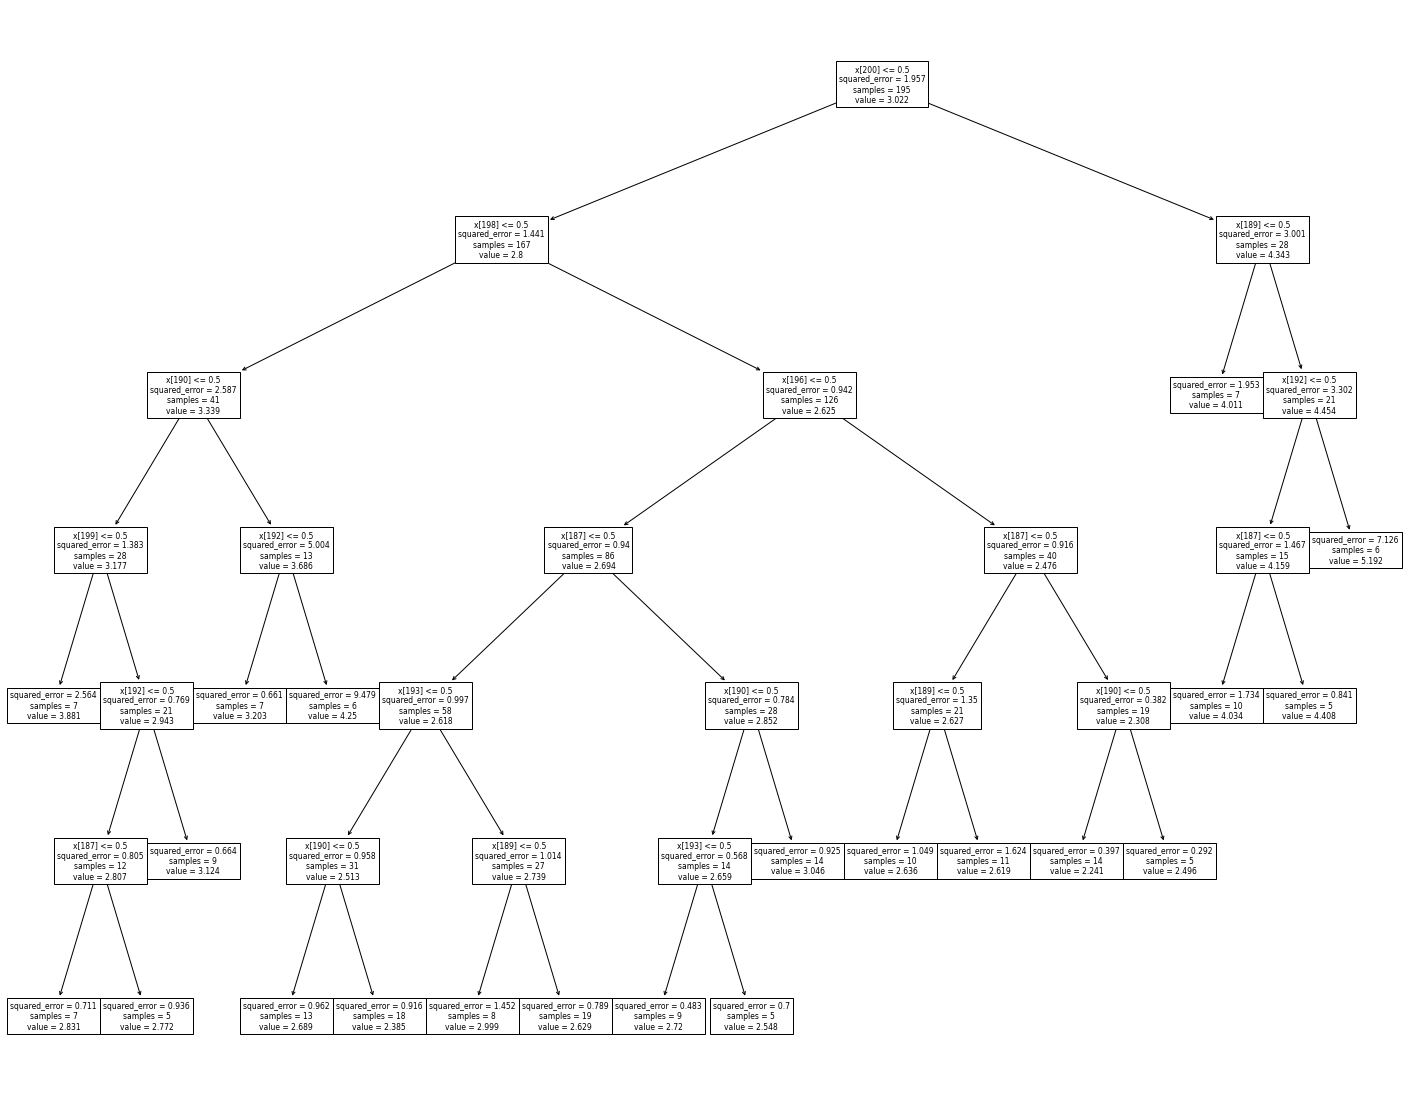

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(arbolH_n_5)
plt.show()

Vamos a hacer un loop para diferentes valores de min_samples_leaf_values y los valores encoded 

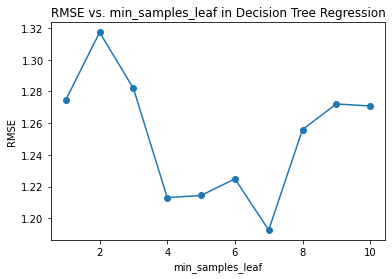

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of max_depth values
min_samples_leaf_values = np.arange(1, 11)

# Initialize an empty list to store the RMSE values
rmse_values = []

# Loop through each max_depth value
for min_samples_leaf in min_samples_leaf_values:
    # Define the Decision Tree regression model
    # Hojas
    arbolH = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    
    # Fit the model to the training data
    arbolH.fit(X_train_encoded, y_train)
    
    # Make predictions on the test data
    y_predH = arbolH.predict(X_test_encoded)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_predH, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)

# Plot the RMSE values against the max_depth values
plt.plot(min_samples_leaf_values, rmse_values, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.title('RMSE vs. min_samples_leaf in Decision Tree Regression')
plt.show()

Vamos a hacer encodigng the las variables caegoricas y contruir un arbol con min_samples_leaf = 5

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder and specify the categories and handle_unknown
encoder = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)

# Fit and transform the categorical variables in the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the categorical variables in the test data
X_test_encoded = encoder.transform(X_test)

# Create and fit the decision tree regressor model
arbolH_n_7 = DecisionTreeRegressor(min_samples_leaf=7)
arbolH_n_7.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_predH_n_7 = arbolH_n_7.predict(X_test_encoded)

y_predH_n_7

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([4.19083333, 4.19083333, 2.68923077, 2.68923077, 4.80444444,
       2.61909091, 3.04571429, 2.385     , 2.30842105, 4.01142857,
       3.68615385, 2.30842105, 3.68615385, 3.88142857, 2.68923077,
       3.04571429, 2.68923077, 2.30842105, 4.01142857, 3.12444444,
       2.30842105, 2.99875   , 2.80666667, 3.88142857, 2.61909091,
       4.01142857, 2.62947368, 3.68615385, 3.12444444, 2.68923077,
       2.62947368, 2.385     , 2.61909091, 2.61909091, 2.62947368,
       2.385     , 2.30842105, 2.99875   , 2.68923077, 2.30842105,
       3.04571429, 2.61909091, 2.80666667, 4.19083333, 2.60428571,
       4.01142857, 2.30842105, 4.19083333, 3.12444444])

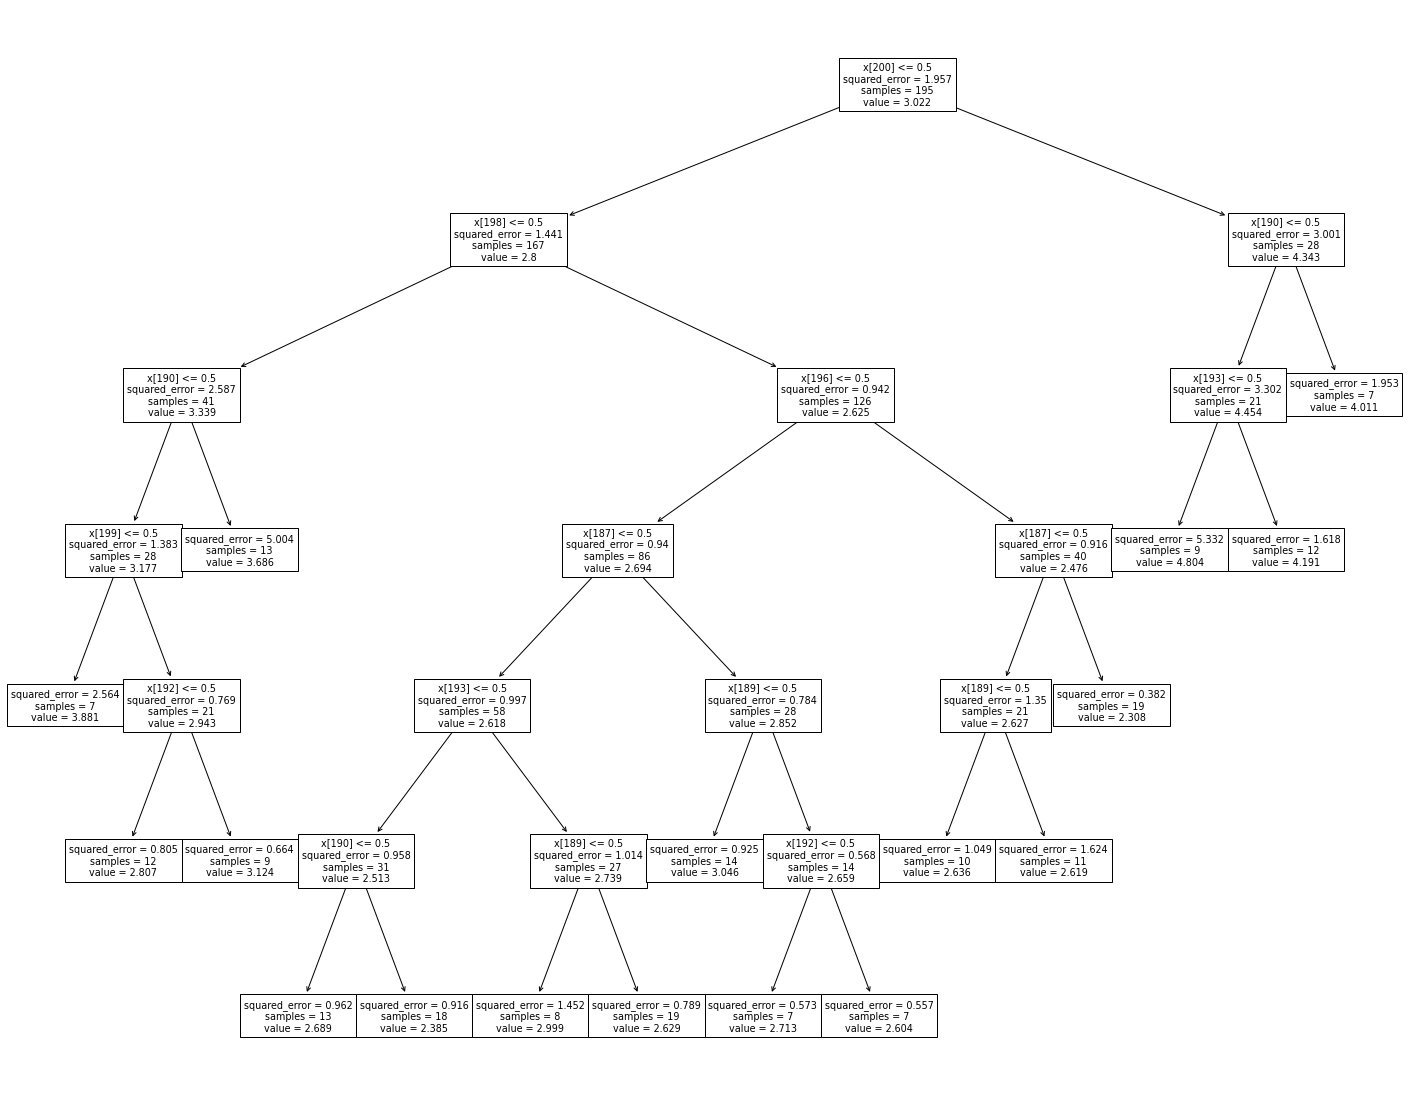

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(arbolH_n_7)
plt.show()